In [25]:
import pandas as pd 
import numpy as np

In [26]:
cancer = pd.read_csv('project1.csv')

In [27]:
cancer.shape

(386, 10)

In [28]:
cancer.size

3860

In [29]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [30]:
cancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [31]:
# All the features need to be changed to categorical except deg-malig which we can leave as an int type

In [32]:
duplicate_rows = cancer.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
cancer = cancer.drop_duplicates()

Number of duplicate rows: 11


In [33]:
cancer.duplicated().sum()

0

In [34]:
missing_values = cancer.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [35]:
cancer['tumor-size'].fillna(cancer['tumor-size'].mode()[0], inplace=True)
cancer['inv-nodes'].fillna(cancer['inv-nodes'].mode()[0], inplace=True)

C:\Users\jeet\AppData\Local\Temp\ipykernel_13084\3444816114.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer['tumor-size'].fillna(cancer['tumor-size'].mode()[0], inplace=True)
C:\Users\jeet\AppData\Local\Temp\ipykernel_13084\3444816114.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [36]:
missing_values = cancer.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [37]:
cancer.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [38]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        375 non-null    object
 1   age          375 non-null    object
 2   menopause    375 non-null    object
 3   tumor-size   375 non-null    object
 4   inv-nodes    375 non-null    object
 5   node-caps    375 non-null    object
 6   deg-malig    375 non-null    int64 
 7   breast       375 non-null    object
 8   breast-quad  375 non-null    object
 9   irradiat     375 non-null    object
dtypes: int64(1), object(9)
memory usage: 32.2+ KB


In [39]:
for column in cancer.columns:
    unique_values = cancer[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'class': ['recurrence-events' 'no-recurrence-events']
Unique values in 'age': ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
Unique values in 'menopause': ['premeno' 'ge40' 'lt40']
Unique values in 'tumor-size': ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Unique values in 'inv-nodes': ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
Unique values in 'node-caps': ['no' '*' 'yes' '?']
Unique values in 'deg-malig': [3 2 1]
Unique values in 'breast': ['left' 'right']
Unique values in 'breast-quad': ['left_low' 'right_up' 'left_up' 'right_low' '?' 'central' '*']
Unique values in 'irradiat': ['no' 'yes']


In [40]:
cancer = cancer[
    ~cancer['node-caps'].isin(['?', '*']) & 
    ~cancer['breast-quad'].isin(['?', '*'])
]

print("Unique values in 'node-caps':", cancer['node-caps'].unique())
print("Unique values in 'breast-quad':", cancer['breast-quad'].unique())

Unique values in 'node-caps': ['no' 'yes']
Unique values in 'breast-quad': ['left_low' 'right_up' 'left_up' 'right_low' 'central']


In [41]:
for column in cancer.columns:
    unique_values = cancer[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'class': ['recurrence-events' 'no-recurrence-events']
Unique values in 'age': ['30-39' '40-49' '60-69' '50-59' '70-79']
Unique values in 'menopause': ['premeno' 'ge40' 'lt40']
Unique values in 'tumor-size': ['30-34' '20-24' '15-19' '0-4' '50-54' '25-29' '10-14' '40-44' '35-39'
 '5-9' '45-49']
Unique values in 'inv-nodes': ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
Unique values in 'node-caps': ['no' 'yes']
Unique values in 'deg-malig': [3 2 1]
Unique values in 'breast': ['left' 'right']
Unique values in 'breast-quad': ['left_low' 'right_up' 'left_up' 'right_low' 'central']
Unique values in 'irradiat': ['no' 'yes']


In [42]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        358 non-null    object
 1   age          358 non-null    object
 2   menopause    358 non-null    object
 3   tumor-size   358 non-null    object
 4   inv-nodes    358 non-null    object
 5   node-caps    358 non-null    object
 6   deg-malig    358 non-null    int64 
 7   breast       358 non-null    object
 8   breast-quad  358 non-null    object
 9   irradiat     358 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.8+ KB


In [43]:
for column in cancer.columns:
    if column != 'deg-malig':  # Skip 'deg-malig'
        cancer[column] = cancer[column].astype('category')

print(cancer.dtypes)

class          category
age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig         int64
breast         category
breast-quad    category
irradiat       category
dtype: object


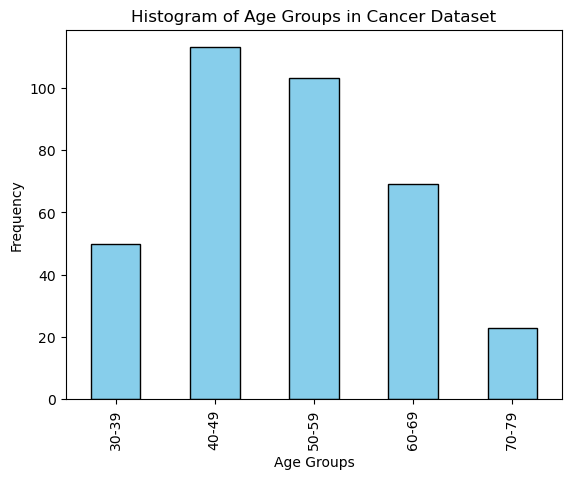

In [44]:
import matplotlib.pyplot as plt

age_counts = cancer['age'].value_counts().sort_index()

age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Histogram of Age Groups in Cancer Dataset')

plt.show()

In [45]:
#We can see that most of the people within this breast cancer dataset are between 40-50 years of age with the lower bound being 30 years and the
#upper bound being 79 years old.

C:\Users\jeet\AppData\Local\Temp\ipykernel_13084\572476902.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='menopause', data=cancer, palette='coolwarm', edgecolor='black')


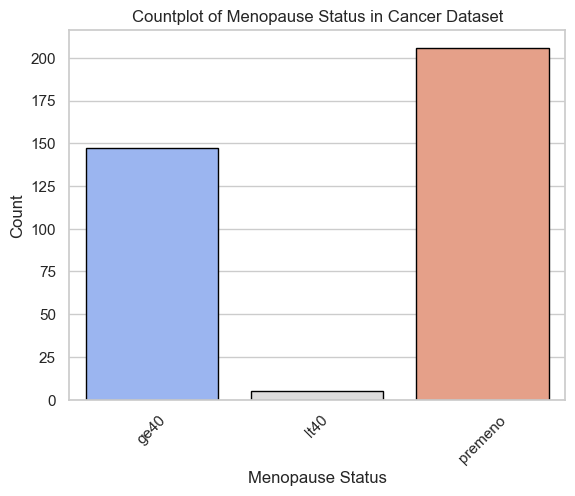

In [46]:
import seaborn as sns

sns.set(style="whitegrid")

sns.countplot(x='menopause', data=cancer, palette='coolwarm', edgecolor='black')

plt.xlabel('Menopause Status')
plt.ylabel('Count')
plt.title('Countplot of Menopause Status in Cancer Dataset')

plt.xticks(rotation=45)

plt.show()

In [47]:
#The count plot shows that the highest menopause status in the data set is premeno at 220 followed by ge40 at almost 150 with lt40 being signifcatnly 
#farther behind at around 12

C:\Users\jeet\AppData\Local\Temp\ipykernel_13084\757409434.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='deg-malig', data=cancer, palette='Set2')


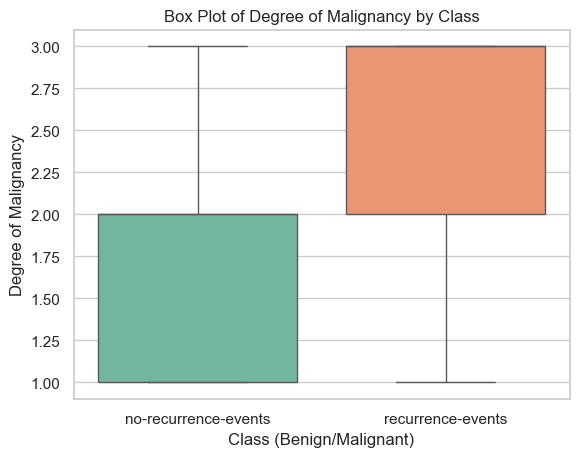

In [48]:
sns.set(style="whitegrid")

sns.boxplot(x='class', y='deg-malig', data=cancer, palette='Set2')

plt.xlabel('Class (Benign/Malignant)')
plt.ylabel('Degree of Malignancy')
plt.title('Box Plot of Degree of Malignancy by Class')

plt.show()

In [49]:
#We can see from the boxplot that those who experiences recurrence-events end up having a higher maligancy values as seen by the boxplots concentration
#as compared to those with no-recurrence-events that have a maligancy value concentrated at the lower values with both ranging from 1-3. 

In [50]:
cancer_encoded = pd.get_dummies(cancer, drop_first=True)
print(cancer_encoded.head())

   deg-malig  class_recurrence-events  age_40-49  age_50-59  age_60-69  \
0          3                     True      False      False      False   
1          2                    False       True      False      False   
2          2                     True       True      False      False   
3          2                    False      False      False       True   
4          2                    False       True      False      False   

   age_70-79  menopause_lt40  menopause_premeno  tumor-size_10-14  \
0      False           False               True             False   
1      False           False               True             False   
2      False           False               True             False   
3      False           False              False             False   
4      False           False               True             False   

   tumor-size_15-19  ...  inv-nodes_3-5  inv-nodes_6-8  inv-nodes_9-11  \
0             False  ...          False          False           F

In [51]:
cancer_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 385
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                358 non-null    int64
 1   class_recurrence-events  358 non-null    bool 
 2   age_40-49                358 non-null    bool 
 3   age_50-59                358 non-null    bool 
 4   age_60-69                358 non-null    bool 
 5   age_70-79                358 non-null    bool 
 6   menopause_lt40           358 non-null    bool 
 7   menopause_premeno        358 non-null    bool 
 8   tumor-size_10-14         358 non-null    bool 
 9   tumor-size_15-19         358 non-null    bool 
 10  tumor-size_20-24         358 non-null    bool 
 11  tumor-size_25-29         358 non-null    bool 
 12  tumor-size_30-34         358 non-null    bool 
 13  tumor-size_35-39         358 non-null    bool 
 14  tumor-size_40-44         358 non-null    bool 
 15  tumor-size_

In [52]:
X = cancer_encoded.drop('class_recurrence-events', axis=1)
y = cancer_encoded['class_recurrence-events'] 

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn.predict(X_test))}")

print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.71      0.88      0.78        74
        True       0.44      0.21      0.28        34

    accuracy                           0.67       108
   macro avg       0.57      0.54      0.53       108
weighted avg       0.62      0.67      0.62       108

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.76      0.91      0.82       169
        True       0.67      0.40      0.50        81

    accuracy                           0.74       250
   macro avg       0.71      0.65      0.66       250
weighted avg       0.73      0.74      0.72       250



In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1, 100)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print(f"Best k: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

best_knn = grid_search.best_estimator_

print(f"Performance on TEST\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")

print(f"Performance on TRAIN\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")

Best k: 3
Best cross-validation accuracy: 0.32
Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.72      0.85      0.78        74
        True       0.48      0.29      0.36        34

    accuracy                           0.68       108
   macro avg       0.60      0.57      0.57       108
weighted avg       0.65      0.68      0.65       108

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.79      0.89      0.84       169
        True       0.70      0.52      0.60        81

    accuracy                           0.77       250
   macro avg       0.75      0.71      0.72       250
weighted avg       0.76      0.77      0.76       250



In [57]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="perceptron", alpha=0.01, random_state=0)

clf.fit(X_train, y_train)

print(f"Performance on TEST\n*******************\n{classification_report(y_test, clf.predict(X_test))}")

print(f"Performance on TRAIN\n********************\n{classification_report(y_train, clf.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.69      1.00      0.81        74
        True       0.00      0.00      0.00        34

    accuracy                           0.69       108
   macro avg       0.34      0.50      0.41       108
weighted avg       0.47      0.69      0.56       108

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.68      1.00      0.81       169
        True       1.00      0.04      0.07        81

    accuracy                           0.69       250
   macro avg       0.84      0.52      0.44       250
weighted avg       0.79      0.69      0.57       250



C:\Users\jeet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeet\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#The most important metric is the true recall as it minimizes false negatives. If we have a large amount of false negatives than people who are at risk
#of recurrence will be told they won't have one when they are likely to which should be minimized.